# Employee Performance Analysis

## INX Future Inc.

## Project Summary
#### Requirement
INX Future Inc, is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. In recent years, the employee performance indexes are not healthy and this has become a growing concern among the top management. The CEO Mr. Brain, decided to initiate a data science project, which analyzes the current employee data and find the core underlying causes of the performance issues. He also expects a clear indicators of non-performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.
The following insights are expected from this project:
- Department wise performances.
- Top 3 Important Factors effecting employee performance.
- A trained model which can predict the employee performance based on factors as inputs.
- Recommendations to improve the employee performance based on insights from analysis.

#### Analysis
- The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.
- To analyze the data, various data processing techniques like Label Encoding and Standardization is used. Correlation Coeffecient is used to interpret the relationship between variables. The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager.
- For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network.
- A separate analysis of Department wise Performance is carried out.

#### Summary
The project was done with the purpose of finding out factors which affected the Performance of the employees, training a model which accurately predicts the Performance Rating of the employee, analyzing the data to provide recommendations to improve the performance and gain insights from the analysis. The following steps were carried out:

- Import the data provided, find out the predictor & target variables and look for missing values.
- Analysis of Department wise performance as asked.
- Label Encoding the ordinal columns.
- Calculate correlation coeffecient to find out the relationship between variables and then select the important features for analysis.
- Standardizing the data and splitting it into test and train.
- Training the data using algorithms like Decision Tree, Random Forest,and XGBoost Classifier and checking the accuracy to find out which algorithm is the best.
- Exporting the model with highest accuracy.

## Importing Libraries

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the given file and basic checks
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df.shape

(1200, 28)

In [4]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
# Describing statistical information
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [6]:
# Checking for any Null Vlaues
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
# cheking columns
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
# Dropping unnecessary columnns
df.drop(['EmpNumber'], axis=1, inplace=True)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# Numerical Features

In [9]:
# checking for numerical features
df_num = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
              'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
              'YearsWithCurrManager']]
df_num

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,55,1,12,10,2,10,7,0,8
1,47,14,42,2,12,20,2,7,7,1,7
2,40,5,48,5,21,20,2,18,13,1,12
3,41,10,73,3,15,23,2,21,6,12,6
4,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0,4
1196,37,10,80,3,17,4,2,1,0,0,0
1197,50,28,74,1,11,20,3,20,8,3,8
1198,34,9,46,1,14,9,3,8,7,7,7


## Checking for Normal Distribution to numerical data


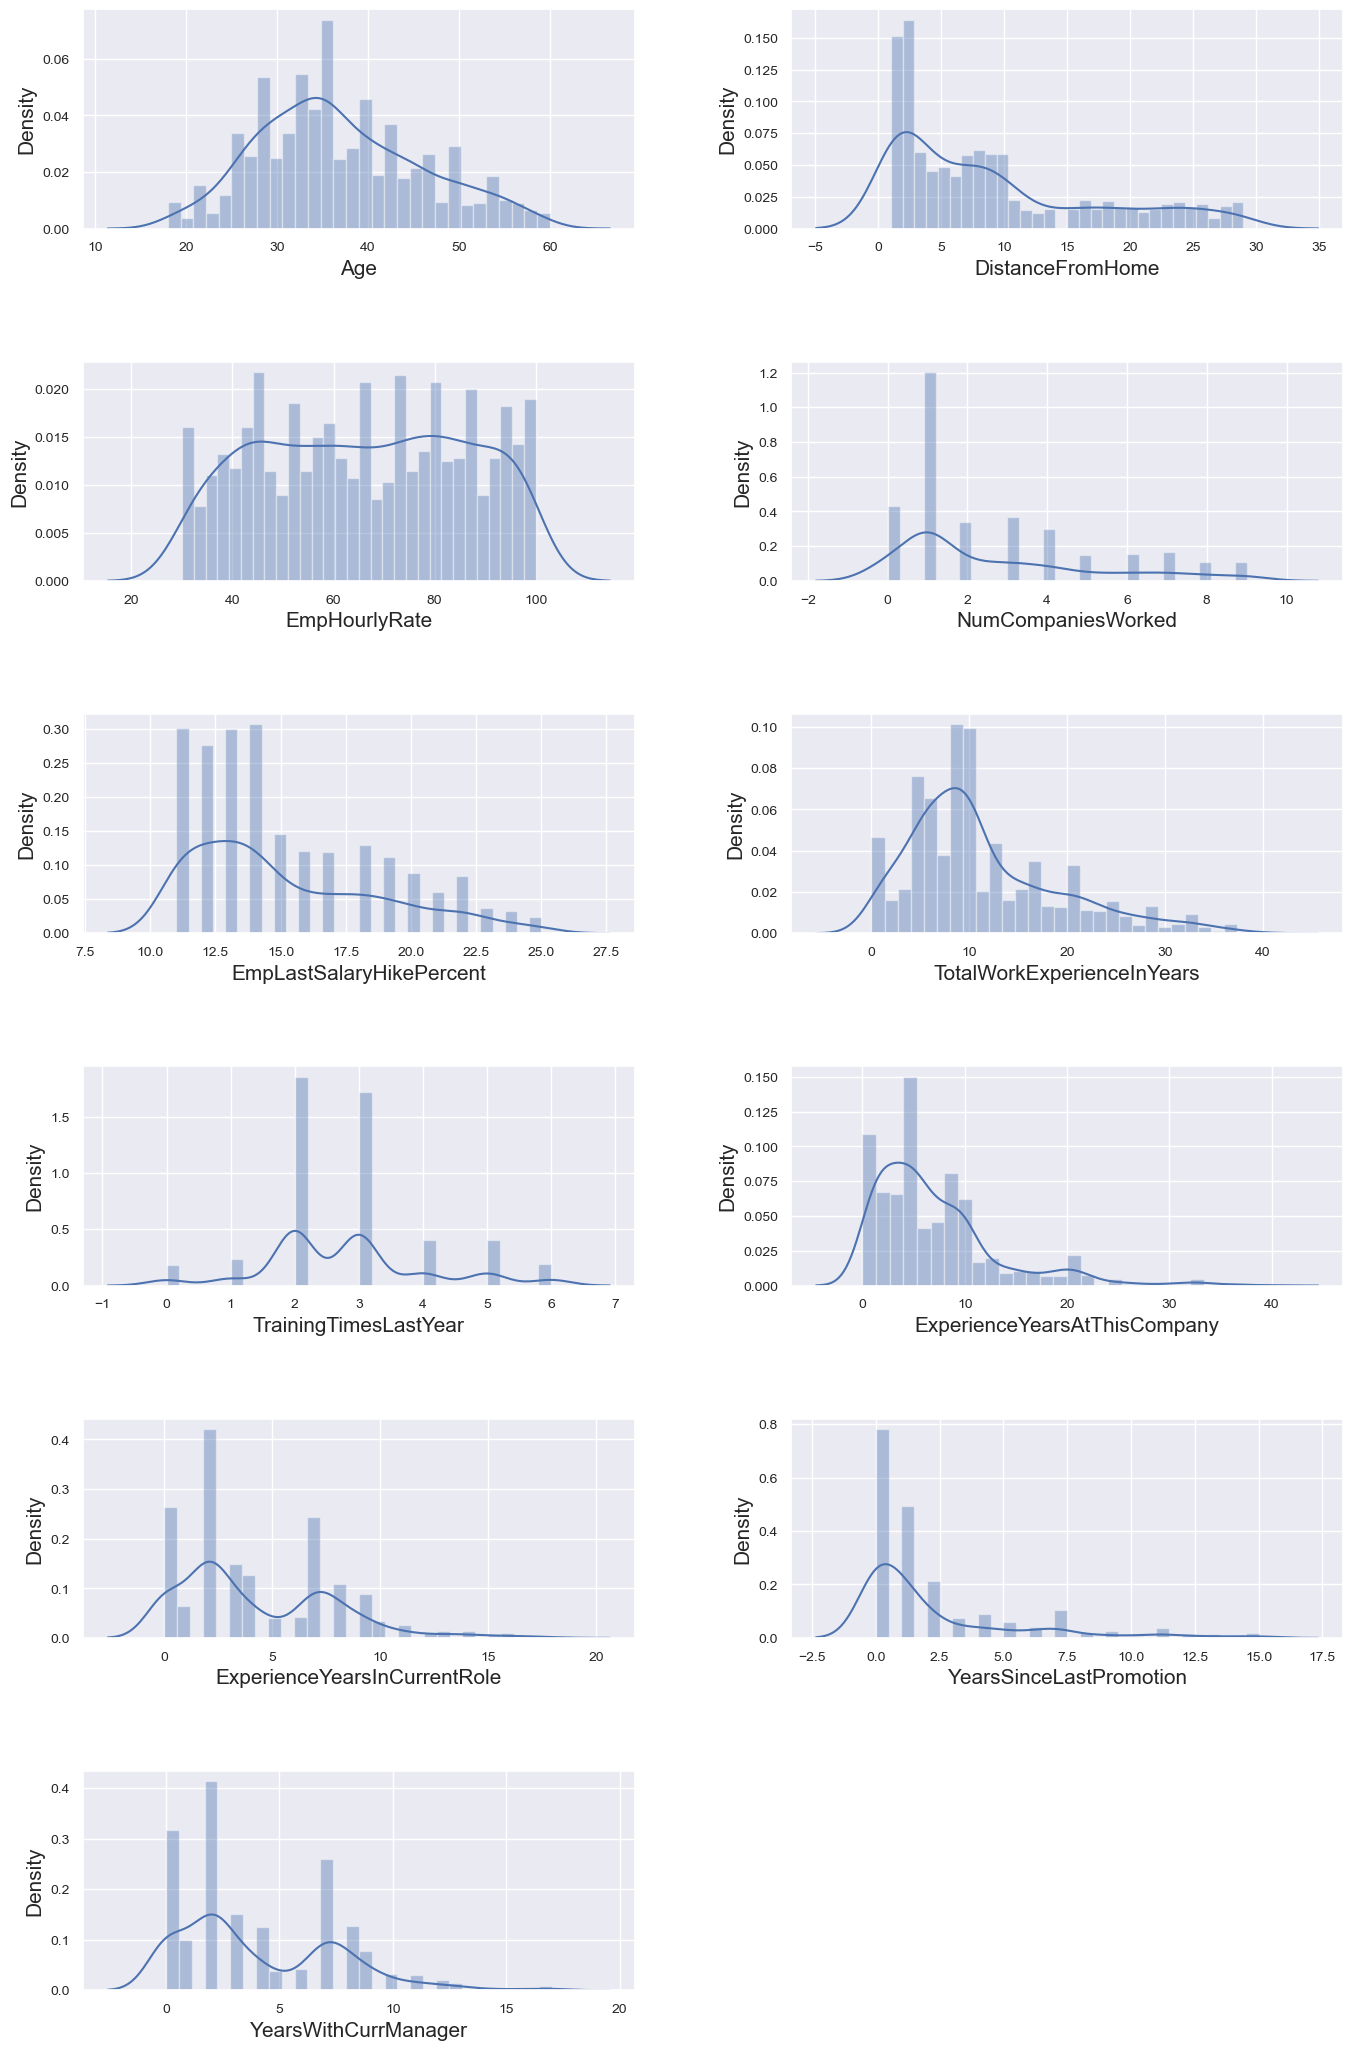

In [10]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":8},style="darkgrid")
num_cols=df.select_dtypes(exclude="object").copy()
fig = plt.figure(figsize=(15,25),dpi=100)
for index,col in enumerate(df_num):
    plt.subplot(7,2,index+1)
    sns.distplot(df_num.loc[:,col].dropna(),kde=True,bins=30)
fig.tight_layout(pad=4.0)

In [11]:
# Defining a funition for checking  skewness
from scipy.stats import skew, kurtosis
def skewness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewness((df_num)))
print('Range of skewness & kurtosis: S< |1.96|')

# Checking Kurtosis
print('skewness for YearsSinceLastPromotion:',skew(df_num.YearsSinceLastPromotion))
print('kurtosis for YearsSinceLastPromotion:',kurtosis(df_num.YearsSinceLastPromotion))

['YearsSinceLastPromotion']
Range of skewness & kurtosis: S< |1.96|
skewness for YearsSinceLastPromotion: 1.9724620367914252
kurtosis for YearsSinceLastPromotion: 3.5193552691799805


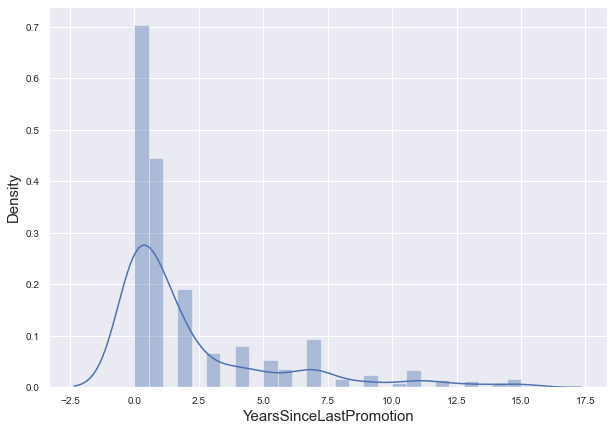

In [12]:
# using distplot
plt.rcParams["figure.figsize"]=10,7
#dist plot
sns.distplot(df_num['YearsSinceLastPromotion'])
plt.show()

In [13]:
# applying square root to the skewed column
df_num['YearsSinceLastPromotion'] = np.sqrt(df_num['YearsSinceLastPromotion'])

In [14]:
df_num['YearsSinceLastPromotion'].skew()

0.7350121906940618

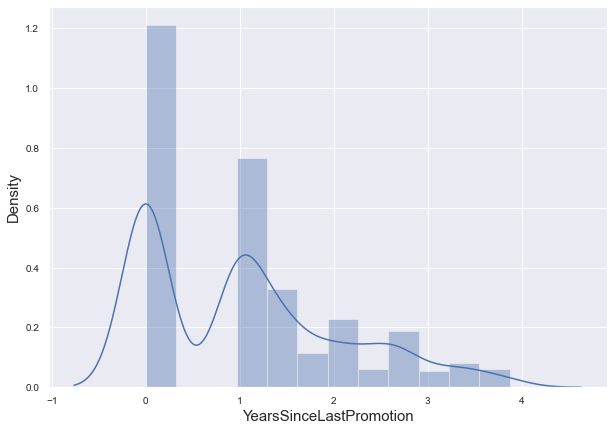

In [15]:
# After transforming the data
plt.rcParams["figure.figsize"]=10,7
#dist plot
sns.distplot(df_num['YearsSinceLastPromotion'])
plt.show()

In [16]:
# checking for skewed columns
from scipy.stats import skew, kurtosis
def skewness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewness(df_num))

[]


## checking normal distribution for Ordinal features

In [17]:
 # Defing ordinal features
ord_data = df[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
'EmpRelationshipSatisfaction','EmpWorkLifeBalance']]


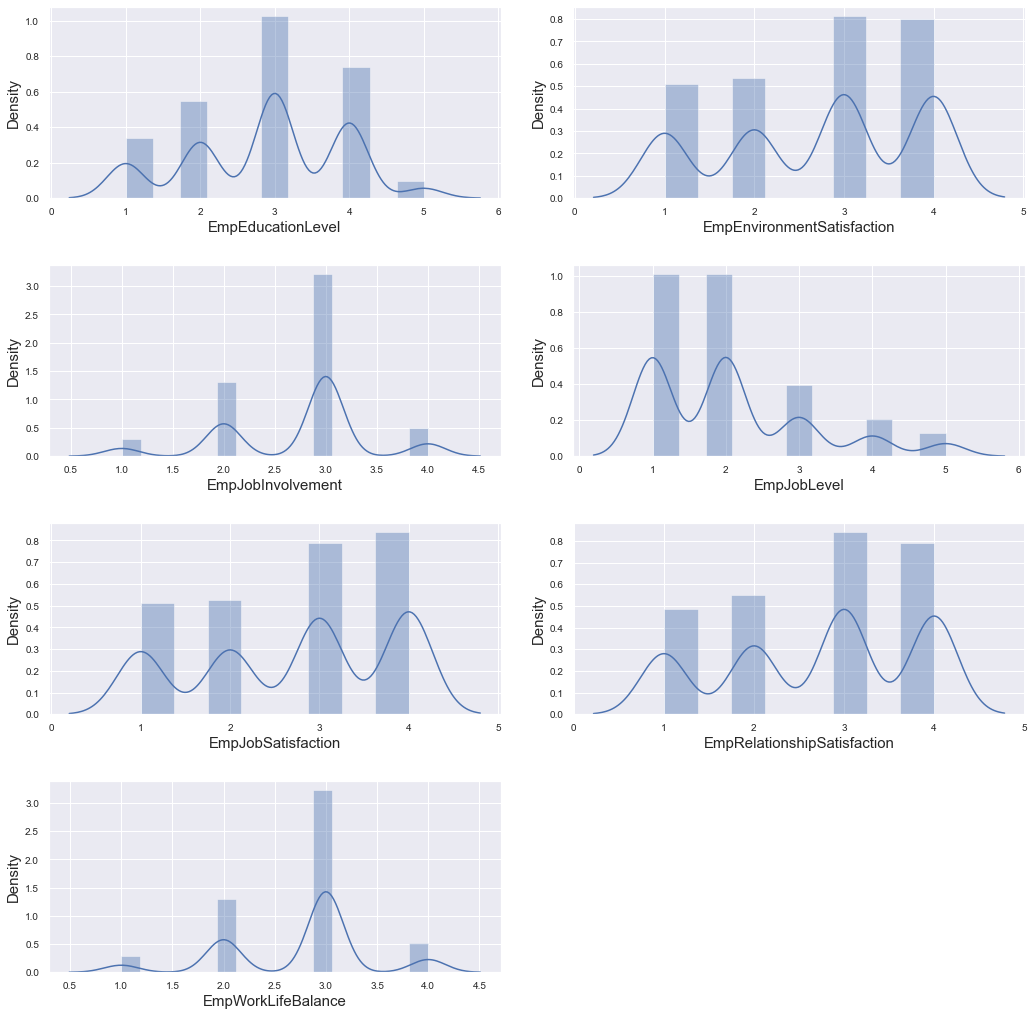

In [18]:
plt.figure(figsize=(15,25))
# Creating loop for ploting ordinal features
for index,cols in enumerate(ord_data):
    plt.subplot(7,2,index+1)
    sns.distplot(ord_data.loc[:,cols])
plt.tight_layout(pad=2)

In [19]:
# storing object type data in obj_data variable
obj_data = df.select_dtypes(include="object")
obj_data

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [20]:
# concating all the features
final_df = pd.concat([df_num,ord_data,obj_data,df['PerformanceRating']], axis=1)
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,3,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No,4
1196,37,10,80,3,17,4,2,1,0,0.000000,...,3,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No,3
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No,3
1198,34,9,46,1,14,9,3,8,7,2.645751,...,4,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No,3


# Checking Outliers


                                                 Checking Outlier in Numerical data                                                



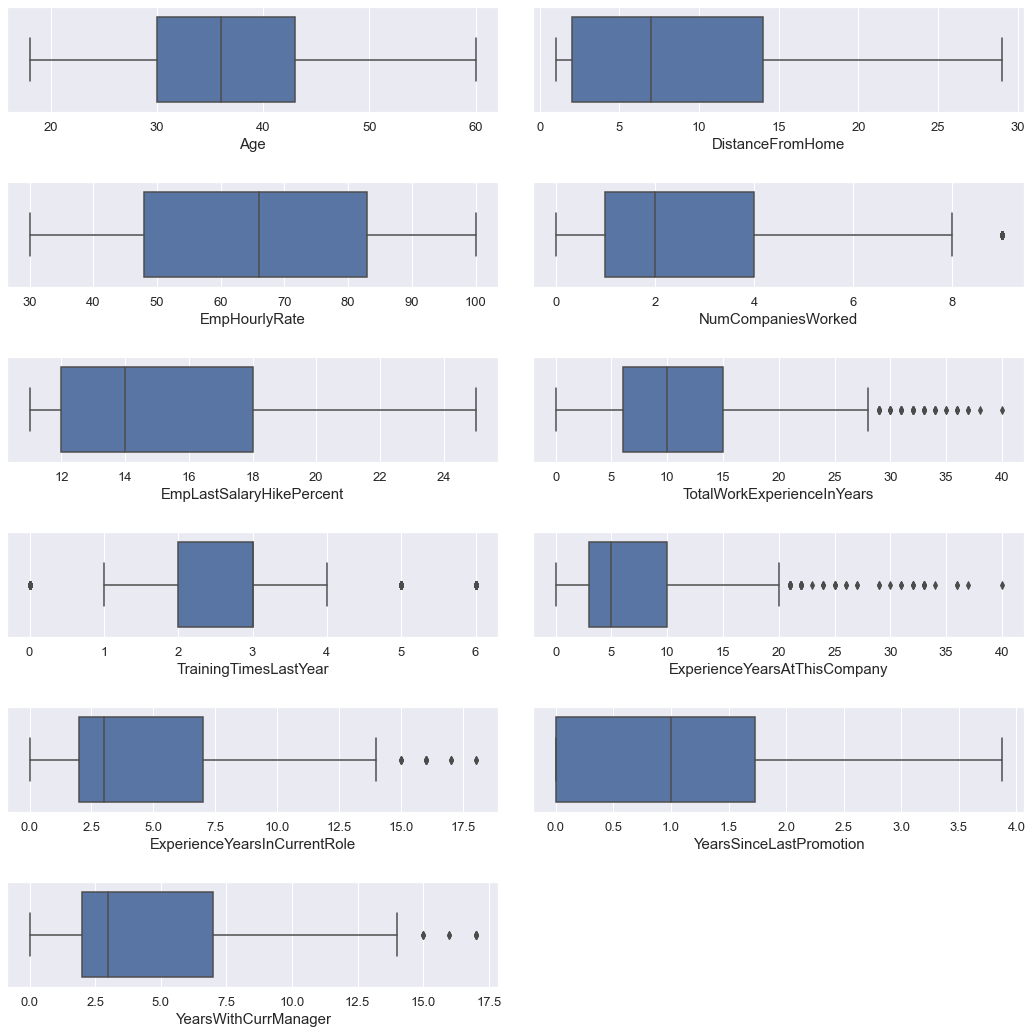

In [21]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,15))

txt = "Checking Outlier in Numerical data"
x = txt.center(131)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(df_num):
    plt.subplot(6,2,index+1)
    sns.boxplot(df_num.loc[:,cols])
plt.tight_layout(pad=2)

These columns are having outliers:
* TotalWorkExperienceInYears
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsWithCurrManager

## Treatment on Outliers

#### TotalWorkExperienceInYears outlier

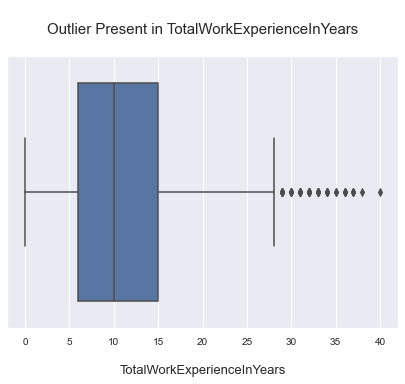

In [22]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["TotalWorkExperienceInYears"])
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n",fontsize=15)
plt.xlabel("\nTotalWorkExperienceInYears",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in TotalWorkExperienceInYears using Z-score method

In [23]:
mean = np.mean(final_df["TotalWorkExperienceInYears"]) 
std = np.std(final_df["TotalWorkExperienceInYears"]) 
threshold = 3.5
outlier = [] 
for i in final_df["TotalWorkExperienceInYears"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [40]


#### Replace the outlier with proper value

In [24]:
final_df["TotalWorkExperienceInYears"] = final_df["TotalWorkExperienceInYears"].replace([40],36)

#### After replacing the outlier with proper value in TotalWorkExperienceInYears

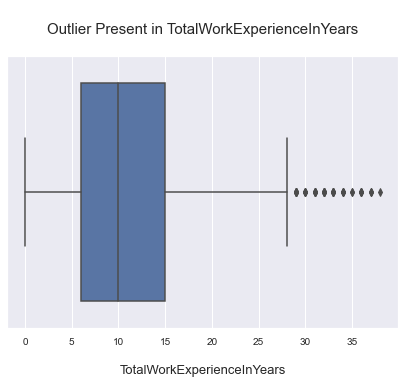

In [25]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["TotalWorkExperienceInYears"])
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n",fontsize=15)
plt.xlabel("\nTotalWorkExperienceInYears",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### ExperienceYearsAtThisCompany outlier

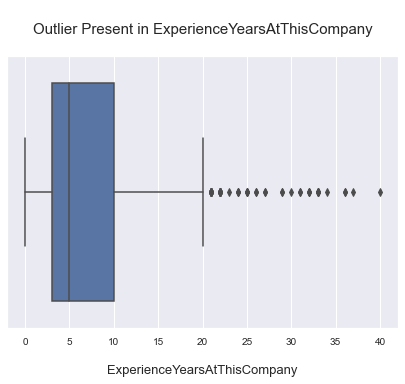

In [26]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["ExperienceYearsAtThisCompany"])
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n",fontsize=15)
plt.xlabel("\nExperienceYearsAtThisCompany",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in ExperienceYearsAtThisCompany using Z-score method

In [27]:
mean = np.mean(final_df["ExperienceYearsAtThisCompany"]) 
std = np.std(final_df["ExperienceYearsAtThisCompany"]) 
threshold = 3.5
outlier = [] 
for i in final_df["ExperienceYearsAtThisCompany"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32]


#### Replace the outlier with proper value

In [28]:
final_df["ExperienceYearsAtThisCompany"] = final_df["ExperienceYearsAtThisCompany"].replace([34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32],27)

#### After replacing the outlier with proper value in ExperienceYearsAtThisCompany

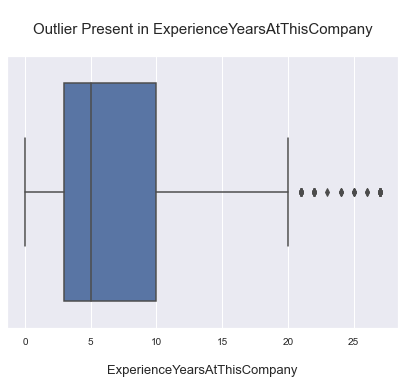

In [29]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["ExperienceYearsAtThisCompany"])
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n",fontsize=15)
plt.xlabel("\nExperienceYearsAtThisCompany",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### ExperienceYearsInCurrentRole outlier

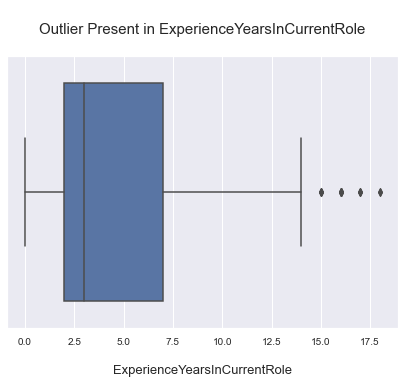

In [30]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["ExperienceYearsInCurrentRole"])
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n",fontsize=15)
plt.xlabel("\nExperienceYearsInCurrentRole",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [31]:
# outlier value using Z score method
mean = np.mean(final_df["ExperienceYearsInCurrentRole"]) 
std = np.std(final_df["ExperienceYearsInCurrentRole"]) 
threshold = 3.5
outlier = [] 
for i in final_df["ExperienceYearsInCurrentRole"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 18, 18, 17]


In [32]:
# Replacing the outliers with values
final_df["ExperienceYearsInCurrentRole"] = final_df["ExperienceYearsInCurrentRole"].replace([17, 17, 18, 18, 17],15)

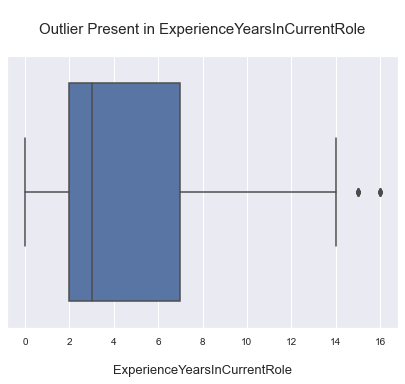

In [33]:
# After replacing values
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["ExperienceYearsInCurrentRole"])
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n",fontsize=15)
plt.xlabel("\nExperienceYearsInCurrentRole",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### YearsWithCurrManager outlier

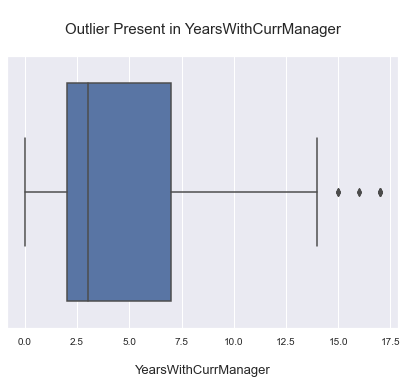

In [34]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["YearsWithCurrManager"])
plt.title("\nOutlier Present in YearsWithCurrManager\n",fontsize=15)
plt.xlabel("\nYearsWithCurrManager",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in YearsWithCurrManager using Z-score method

In [35]:
mean = np.mean(final_df["YearsWithCurrManager"]) 
std = np.std(final_df["YearsWithCurrManager"]) 
threshold = 3.5
outlier = [] 
for i in final_df["YearsWithCurrManager"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 17, 17, 17, 17]


#### Replace the outlier with proper values

In [36]:
final_df["YearsWithCurrManager"] = final_df["YearsWithCurrManager"].replace([17, 17, 17, 17, 17, 17],15)

#### After replacing the outlier with proper ExperienceYearsInCurrentRole

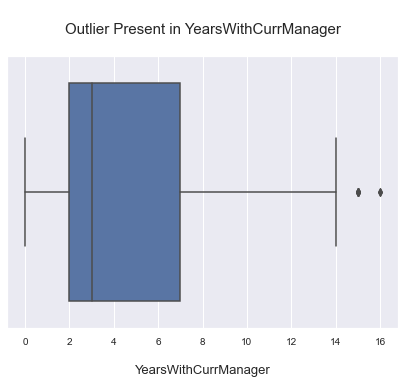

In [37]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["YearsWithCurrManager"])
plt.title("\nOutlier Present in YearsWithCurrManager\n",fontsize=15)
plt.xlabel("\nYearsWithCurrManager",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [38]:
obj_data.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

## Label Encoding


In [39]:
# Converting Labeled data to Numerical data using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']] = final_df[['Gender', 'EducationBackground', 
        'MaritalStatus', 'EmpDepartment','EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']].apply(label.fit_transform)

In [40]:
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,1,2,2,5,13,2,0,0,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,1,2,2,5,13,2,0,0,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,1,1,1,5,13,1,1,0,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,1,0,0,3,8,2,0,0,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,1,2,2,5,13,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,3,0,3,0,5,13,1,1,0,4
1196,37,10,80,3,17,4,2,1,0,0.000000,...,3,1,1,2,1,15,2,0,0,3
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,1,3,1,1,15,2,1,0,3
1198,34,9,46,1,14,9,3,8,7,2.645751,...,4,0,3,2,0,1,2,0,0,3


In [41]:
# defing Independent variables as X
X = final_df.iloc[:,:-1]
# Defing Target variable or dependent variable
y = final_df.iloc[:,-1]
X

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,2,3,0,3,0,5,13,1,1,0
1196,37,10,80,3,17,4,2,1,0,0.000000,...,1,3,1,1,2,1,15,2,0,0
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,3,1,3,1,1,15,2,1,0
1198,34,9,46,1,14,9,3,8,7,2.645751,...,2,4,0,3,2,0,1,2,0,0


## Checking for Imbalance data

In [42]:
y.value_counts(normalize=True)*100

3    72.833333
2    16.166667
4    11.000000
Name: PerformanceRating, dtype: float64

Our ML Algorithm learn more about <b> level 3</b> performance rating compare to <b>level 2</b> & <b>level 4</b>. It will lead biasing problem. So we have to balance the data

## Handling Imbalanced data
#### Converting Imbalance data into balanced data

* Balancing data with SMOTE Technique gives more number of NaN values
* so, we use RandomOverSampler Technique to balance the data

In [43]:
# Imports
from imblearn.over_sampling import RandomOverSampler
# Intilizing the model
oversampling = RandomOverSampler()
X_over_smote, y_over_smote = oversampling.fit_resample(X,y)
X_over_smote = pd.DataFrame(X_over_smote)
X_over_smote.columns = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition']
X_over_smote

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,45,28,97,4,20,8,3,5,4,0.000000,...,4,3,1,5,1,4,12,2,0,0
2618,40,6,38,1,21,21,2,21,7,2.645751,...,4,3,1,3,2,3,8,2,1,0
2619,31,7,44,9,21,10,3,5,4,0.000000,...,3,2,1,1,0,5,8,2,0,0
2620,41,9,94,1,20,5,2,5,3,0.000000,...,2,3,1,1,0,4,7,2,0,0


In [44]:
y_over_smote.value_counts(normalize=True)*100

2    33.333333
4    33.333333
3    33.333333
Name: PerformanceRating, dtype: float64

#### Now, we can say our data is balanced

In [45]:
# Again checking for Normal distribution in balanced data
from scipy.stats import skew
def skewness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

skewness(X_over_smote)


[]

# Correlation of heat map

1.Correlation is a statistical measure that expresses the extent to which two variables are linearly related (means they change together at a constant rate)

2.By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas data frame, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that data frame. The correlation works bet for numerical data where we are going to use all the numerical features present in the data.


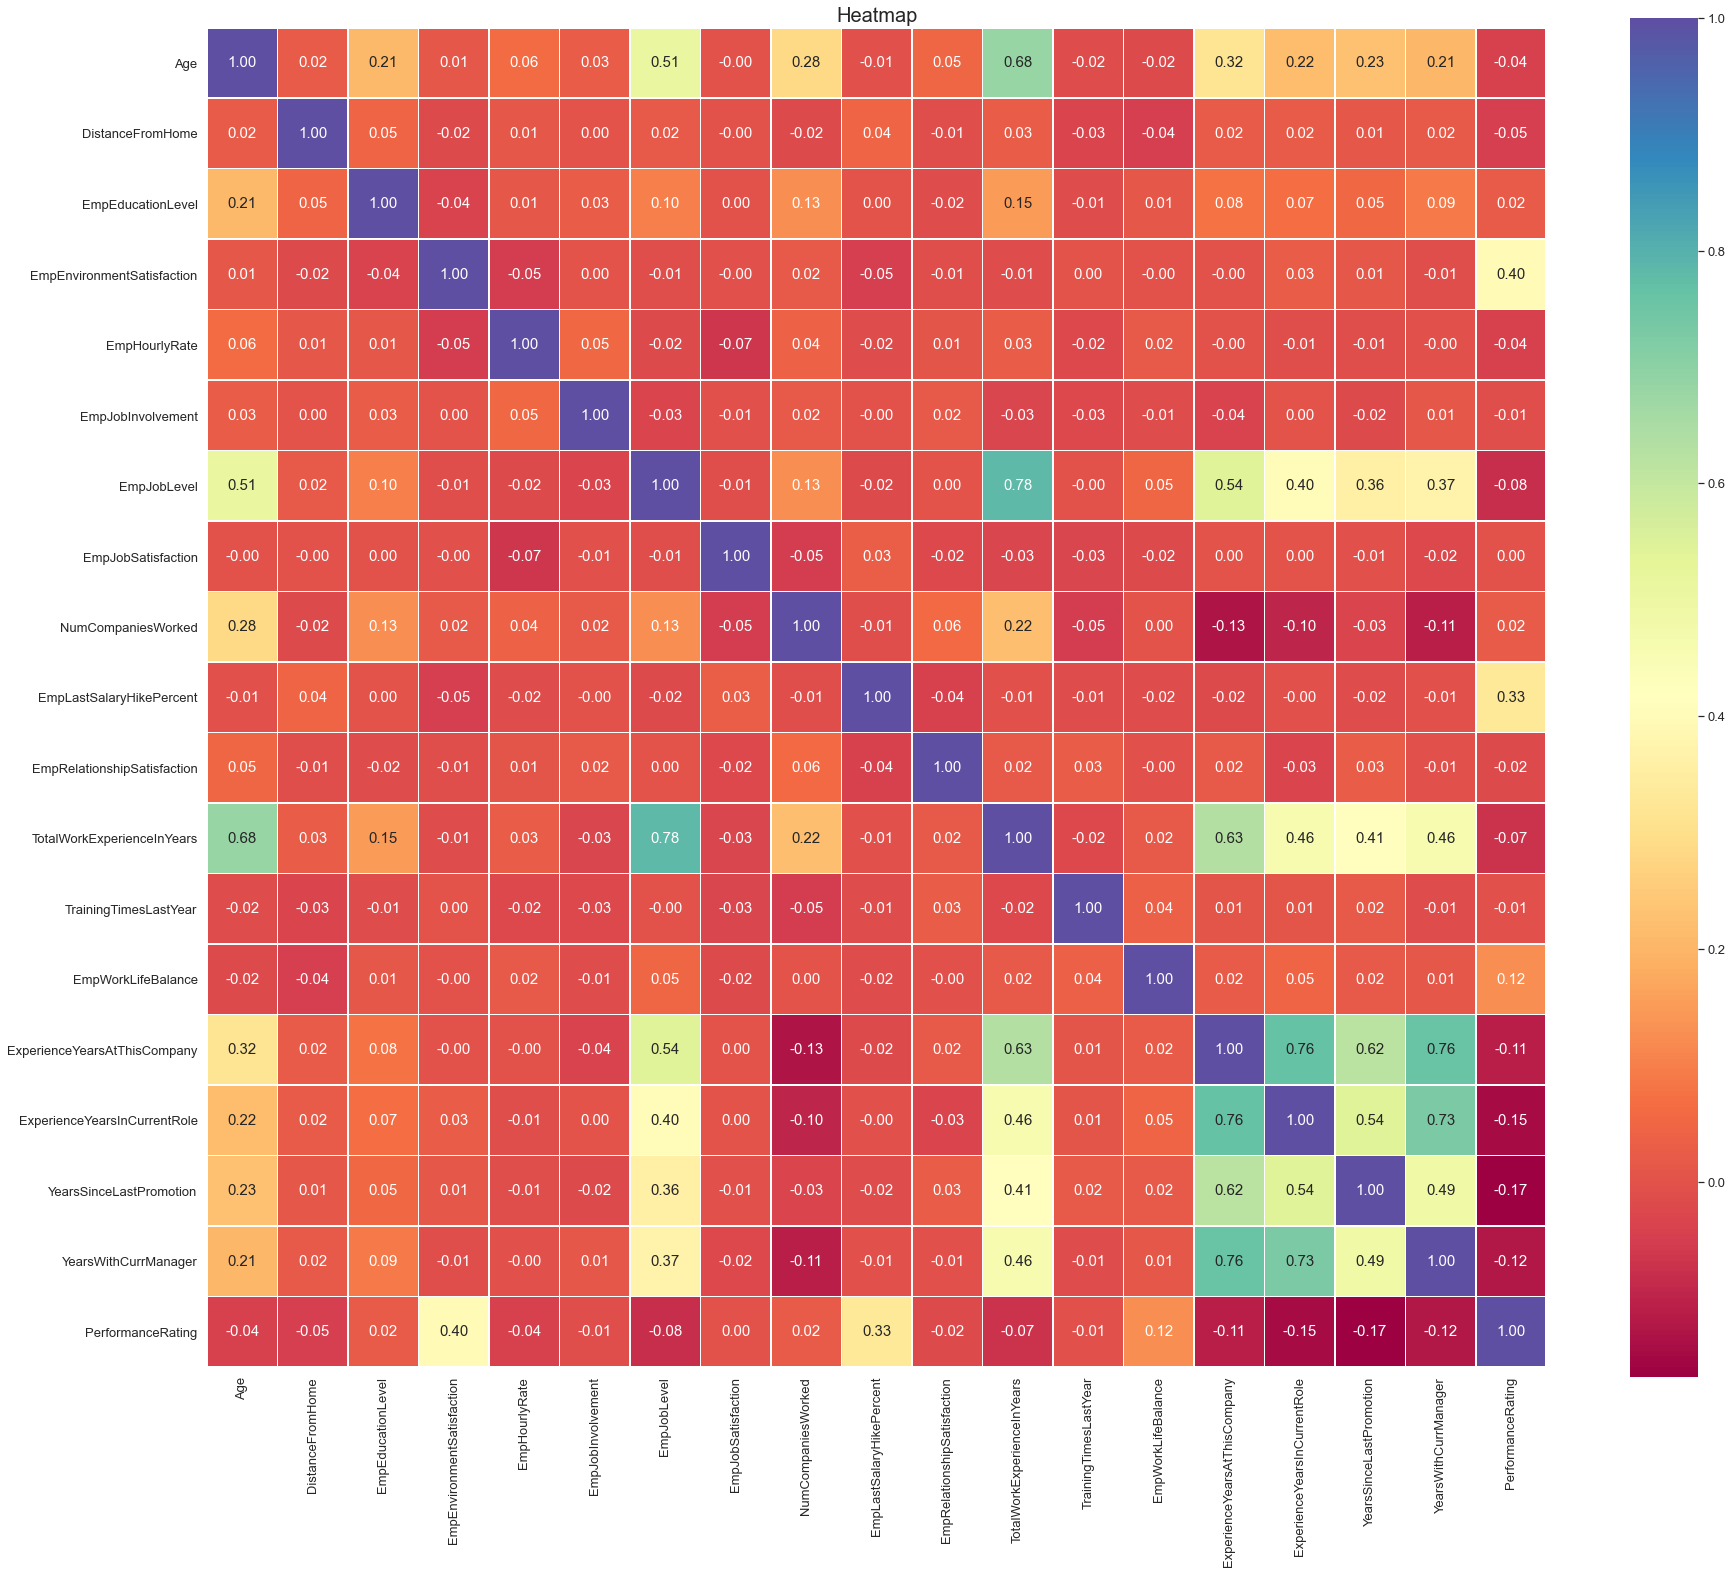

In [46]:
plt.figure(figsize=(30,25))
plt.title('Heatmap')
sns.despine()
sns.heatmap(df.corr(),linewidths=0.6, annot=True,square=True,fmt='.2f',cmap='Spectral')
plt.show()

These three variables are positively correlated with performance rating( Target variable)

* EmpEnvironmentSatisfaction
* EmpLastSalaryHikePercent
* EmpWorkLifeBalance


# Feature Selection

In [47]:
# checking the important features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_over_smote,y_over_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_over_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(featurescores.nlargest(5,'Scores'))

                   feature_names       Scores
4       EmpLastSalaryHikePercent  1177.360545
7   ExperienceYearsAtThisCompany   620.838334
8   ExperienceYearsInCurrentRole   504.770065
12    EmpEnvironmentSatisfaction   454.499172
10          YearsWithCurrManager   437.765256


 These are Top 5 important features in given data

In [48]:
#checking the columns
X_over_smote.columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [49]:
# splitting the data

X = X_over_smote.loc[:,['EmpLastSalaryHikePercent','ExperienceYearsAtThisCompany','EmpEnvironmentSatisfaction','EmpEnvironmentSatisfaction','YearsSinceLastPromotion']] 
y = y_over_smote 

# Training data

In [50]:
# spliting Train data and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.20)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((2097, 5), (525, 5), (2097,), (525,))

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))

Accuracy score : 94.48 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      0.98      0.95       169
           3       0.97      0.86      0.91       168
           4       0.94      0.99      0.97       188

    accuracy                           0.94       525
   macro avg       0.95      0.94      0.94       525
weighted avg       0.95      0.94      0.94       525



 The Accuracy Score in RandomForestClassifier is 94 %

# XGB Classifier

In [54]:
from xgboost import XGBClassifier
ab = XGBClassifier()
ab.fit(X_train,y_train)
ab_pred = ab.predict(X_test)

[11:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,ab_pred))

Accuracy score : 94.48 %

Classification Report

              precision    recall  f1-score   support

           2       0.91      0.96      0.94       169
           3       0.96      0.84      0.90       168
           4       0.93      0.99      0.96       188

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



The Accuracy Score in XGB Classifier is 94 %

# Hyper parameter Tuning

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3,4,5,10,15,20,30],
           'random_state':[2,3,4,7,10,27,37,42],
           'n_estimators':[5,10,30,50,70,100,150],
            'criterion':['gini','entropy']  
           } 

grid = GridSearchCV(model,parameters, cv=10,verbose=1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30],
                         'n_estimators': [5, 10, 30, 50, 70, 100, 150],
                         'random_state': [2, 3, 4, 7, 10, 27, 37, 42]},
             verbose=1)

In [63]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 30, 'random_state': 7}

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_lr = RandomForestClassifier(criterion='gini',max_depth= 30, n_estimators=30, random_state=7)
rf_lr.fit(X_train,y_train)
y_predict_lr = rf_lr.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict_lr))

Accuracy score : 94.48 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      0.96      0.94       169
           3       0.95      0.86      0.90       168
           4       0.94      0.99      0.96       188

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



 After Hyperparameter Tuning the Acuracy Score in RandomForestClassifier is 94 %